In [3]:
import copy
import warnings
import copy
import numpy as np
import pandas as pd
import fsspec
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from PIL import Image
from fuzzywuzzy import fuzz
from matplotlib.colors import LogNorm


- Load emotion scores of ba

In [4]:
sc_ba =  pd.read_csv('./emotion_scores_ba.csv')

In [5]:
display(sc_ba)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,rating,text,review,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score,review_id
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,...,3.91,This was a 12 oz bottle poured into a snifter....,True,0.140434,0.098460,0.183308,0.110480,0.063523,0.206475,1
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1357729200,AgentMunky,agentmunky.409755,4.00,...,3.64,Poured from a 12 ounce bottle into a pilsner g...,True,0.042814,-0.025405,0.035445,0.050315,0.073893,0.100089,2
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1353150000,ferrari29,ferrari29.320392,3.00,...,2.77,Beer poured from bottle into a Nonic shaped pi...,True,0.137628,0.088925,0.117135,0.089561,0.065970,0.218292,3
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1342260000,OtherShoe2,othershoe2.233642,4.00,...,3.68,Pours a rich brownish red with some chill haze...,True,0.317167,0.239101,0.234795,0.028498,0.189511,0.214309,4
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1335607200,brentk56,brentk56.6284,4.50,...,2.84,Appearance,True,0.320882,0.314638,0.318239,0.314683,0.426614,0.436564,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276897,Lazy Saison,72174,Twisted Manzanita Ales,23640,Saison / Farmhouse Ale,7.0,1317290400,buzzardman,buzzardman.622276,3.00,...,1.66,I have to admit I have never had a saison styl...,True,-0.008019,-0.084279,0.060394,-0.034452,-0.074945,0.026458,276898
276898,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1390820400,Mightykingmalard,mightykingmalard.771101,3.00,...,3.61,Appearance,True,0.320882,0.314638,0.318239,0.314683,0.426614,0.436564,276899
276899,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1359370800,ALBuff,albuff.715358,4.00,...,3.91,If you'd ever wondered what it'd taste like to...,True,0.185740,0.017143,0.151628,0.065803,0.084986,0.188366,276900
276900,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1357642800,HalfFull,halffull.196628,3.50,...,3.82,"Poured on tap into a shaker pint glass, showin...",True,0.101623,0.074504,0.099249,0.077557,0.024307,0.234993,276901


In [10]:
#Drop duplicate text
sc_ba_filtered = sc_ba.drop_duplicates(subset = ['text'])

In [11]:
sc_ba_filtered

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,rating,text,review,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score,review_id
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,...,3.91,This was a 12 oz bottle poured into a snifter....,True,0.140434,0.098460,0.183308,0.110480,0.063523,0.206475,1
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1357729200,AgentMunky,agentmunky.409755,4.00,...,3.64,Poured from a 12 ounce bottle into a pilsner g...,True,0.042814,-0.025405,0.035445,0.050315,0.073893,0.100089,2
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1353150000,ferrari29,ferrari29.320392,3.00,...,2.77,Beer poured from bottle into a Nonic shaped pi...,True,0.137628,0.088925,0.117135,0.089561,0.065970,0.218292,3
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1342260000,OtherShoe2,othershoe2.233642,4.00,...,3.68,Pours a rich brownish red with some chill haze...,True,0.317167,0.239101,0.234795,0.028498,0.189511,0.214309,4
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1335607200,brentk56,brentk56.6284,4.50,...,2.84,Appearance,True,0.320882,0.314638,0.318239,0.314683,0.426614,0.436564,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276896,Lazy Saison,72174,Twisted Manzanita Ales,23640,Saison / Farmhouse Ale,7.0,1317722400,mactrail,mactrail.311921,4.00,...,4.18,Beautiful golden color with a touch of amber. ...,True,0.226841,0.019434,0.039087,0.099909,0.066275,0.227024,276897
276897,Lazy Saison,72174,Twisted Manzanita Ales,23640,Saison / Farmhouse Ale,7.0,1317290400,buzzardman,buzzardman.622276,3.00,...,1.66,I have to admit I have never had a saison styl...,True,-0.008019,-0.084279,0.060394,-0.034452,-0.074945,0.026458,276898
276899,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1359370800,ALBuff,albuff.715358,4.00,...,3.91,If you'd ever wondered what it'd taste like to...,True,0.185740,0.017143,0.151628,0.065803,0.084986,0.188366,276900
276900,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1357642800,HalfFull,halffull.196628,3.50,...,3.82,"Poured on tap into a shaker pint glass, showin...",True,0.101623,0.074504,0.099249,0.077557,0.024307,0.234993,276901


- Load user datset

In [12]:
file_path = '.\\matched_beer_data\\users.csv'  
user = pd.read_csv(file_path)
new_columns = user.iloc[0]
user = user[1:]

seen_names = {}
new_column_names = []
for name in new_columns:
    if name in seen_names:
        seen_names[name] += 1
        new_column_names.append(f'{name}_{seen_names[name]}')
    else:
        seen_names[name] = 0
        new_column_names.append(name)


user.columns = new_column_names
user

,joined,location,nbr_ratings,nbr_reviews,user_id,user_name,user_name_lower,joined_1,location_1,nbr_ratings_1,user_id_1,user_name_1,user_name_lower_1
1,1220868000.0,Germany,6,6,erzengel.248045,Erzengel,erzengel,1224324000.0,Germany,8781,83106,Erzengel,erzengel
2,1348394400.0,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1385722800.0,"United States, Virginia",6240,290599,GenDV138,gendv138
3,1207303200.0,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1150797600.0,"United States, Washington",7452,38859,nimbleprop,nimbleprop
4,1322737200.0,Estonia,11,0,visionthing.639993,visionthing,visionthing,1242986400.0,Estonia,5462,91324,visionthing,visionthing
5,1432116000.0,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1431165600.0,England,1096,368991,LazyPyro,lazypyro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,1253181600.0,"United States, Pennsylvania",398,398,shadesofgray.371155,ShadesOfGray,shadesofgray,1261998000.0,"United States, Pennsylvania",1,99346,ShadesOfGray,shadesofgray
3017,1095847200.0,"United States, Michigan",587,587,ypsifly.8833,ypsifly,ypsifly,1139569200.0,"United States, Michigan",1,33393,ypsifly,ypsifly
3018,1047121200.0,"United States, Texas",1379,1379,hardtarget.1712,HardTarget,hardtarget,1095933600.0,"United States, Texas",1,15553,HardTarget,hardtarget
3019,1416740400.0,Vietnam,176,24,nelsonsaigon.897449,nelsonsaigon,nelsonsaigon,1406368800.0,Vietnam,1,327965,nelsonsaigon,nelsonsaigon


In [13]:
unique_user_ids = user['user_id'].nunique()

print("The number of unique user_id of user dataset is:", unique_user_ids)

The number of unique user_id of user dataset is: 3020


In [14]:
url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/" \
      "download/110m/cultural/ne_110m_admin_0_countries.zip"
    
with fsspec.open(f"simplecache::{url}") as file:
    world = gpd.read_file(file)
    
#Mapping user location names to gpd location names
location = []
for item1 in user['location'].values:
    closest_match = None
    highest_similarity = 0
    for item2 in world['SOVEREIGNT'].values:
        similarity = fuzz.ratio(item1, item2)
        if similarity > highest_similarity:
            closest_match = item2
            highest_similarity = similarity
    location.append(closest_match)
    
user['country'] = location

In [15]:
user['location']

1                           Germany
2           United States, Virginia
3         United States, Washington
4                           Estonia
5                           England
                   ...             
3016    United States, Pennsylvania
3017        United States, Michigan
3018           United States, Texas
3019                        Vietnam
3020                         Sweden
Name: location, Length: 3020, dtype: object

In [16]:
# Getting user location and their counts
user_counts = user['location'].value_counts().reset_index()
user_counts.columns = ['country', 'count']

Regional distribution of reviews’ moods

In [18]:
#Merge location information
ba_loc = pd.merge(sc_ba_filtered, user[['user_id', 'country']], on='user_id', how='left')
ba_loc

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,...,text,review,joy_score,sadness_score,anger_score,fear_score,love_score,surprise_score,review_id,country
0,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1360753200,brewdude1982,brewdude1982.691169,4.25,...,This was a 12 oz bottle poured into a snifter....,True,0.140434,0.098460,0.183308,0.110480,0.063523,0.206475,1,NaN
1,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1357729200,AgentMunky,agentmunky.409755,4.00,...,Poured from a 12 ounce bottle into a pilsner g...,True,0.042814,-0.025405,0.035445,0.050315,0.073893,0.100089,2,NaN
2,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1353150000,ferrari29,ferrari29.320392,3.00,...,Beer poured from bottle into a Nonic shaped pi...,True,0.137628,0.088925,0.117135,0.089561,0.065970,0.218292,3,NaN
3,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1342260000,OtherShoe2,othershoe2.233642,4.00,...,Pours a rich brownish red with some chill haze...,True,0.317167,0.239101,0.234795,0.028498,0.189511,0.214309,4,NaN
4,Legbiter,19827,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.8,1335607200,brentk56,brentk56.6284,4.50,...,Appearance,True,0.320882,0.314638,0.318239,0.314683,0.426614,0.436564,5,United States of America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249926,Lazy Saison,72174,Twisted Manzanita Ales,23640,Saison / Farmhouse Ale,7.0,1317722400,mactrail,mactrail.311921,4.00,...,Beautiful golden color with a touch of amber. ...,True,0.226841,0.019434,0.039087,0.099909,0.066275,0.227024,276897,NaN
249927,Lazy Saison,72174,Twisted Manzanita Ales,23640,Saison / Farmhouse Ale,7.0,1317290400,buzzardman,buzzardman.622276,3.00,...,I have to admit I have never had a saison styl...,True,-0.008019,-0.084279,0.060394,-0.034452,-0.074945,0.026458,276898,NaN
249928,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1359370800,ALBuff,albuff.715358,4.00,...,If you'd ever wondered what it'd taste like to...,True,0.185740,0.017143,0.151628,0.065803,0.084986,0.188366,276900,NaN
249929,Night Before Christmas,77388,Twisted Manzanita Ales,23640,American Stout,7.4,1357642800,HalfFull,halffull.196628,3.50,...,"Poured on tap into a shaker pint glass, showin...",True,0.101623,0.074504,0.099249,0.077557,0.024307,0.234993,276901,NaN


In [21]:
ba_country = ba_loc[pd.notna(ba_loc['country'])]

- joy_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


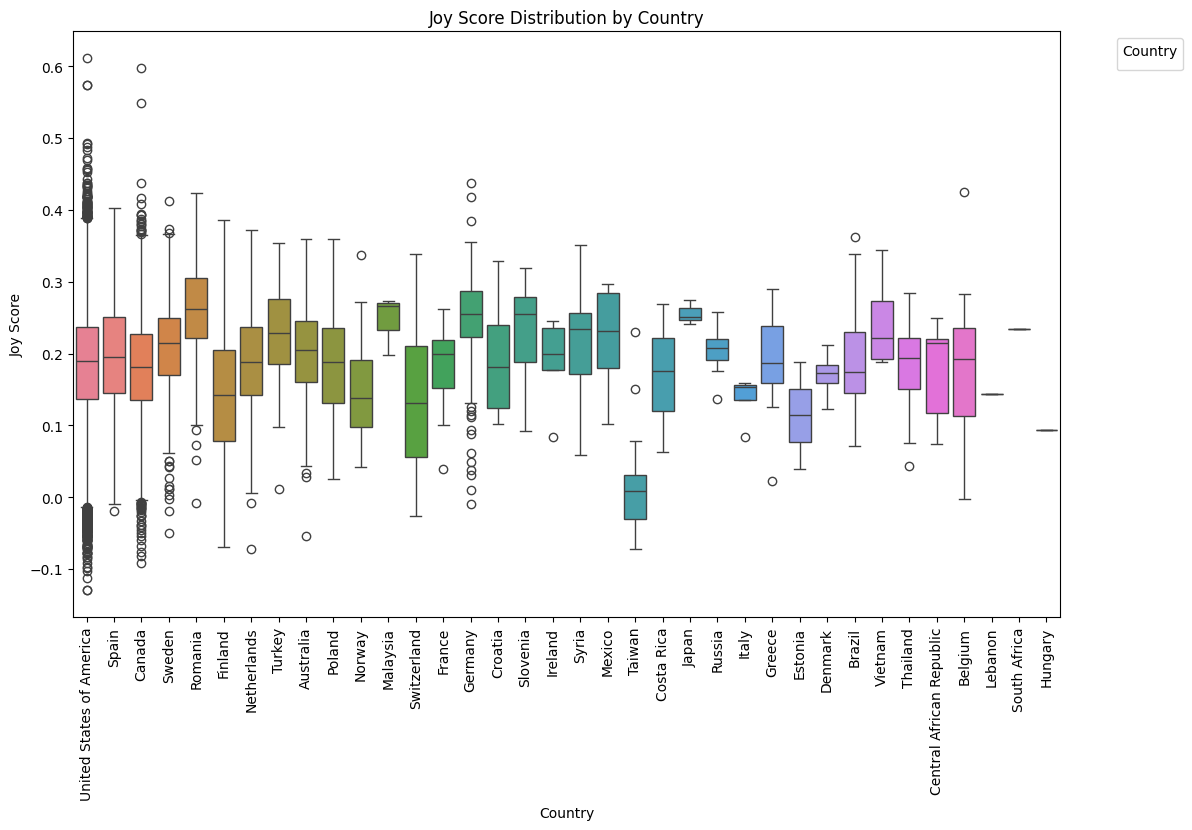

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import re


plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='joy_score', data=ba_country, hue='country')
plt.title('Joy Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Joy Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.xticks(rotation=90)
plt.show()


- sadness_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


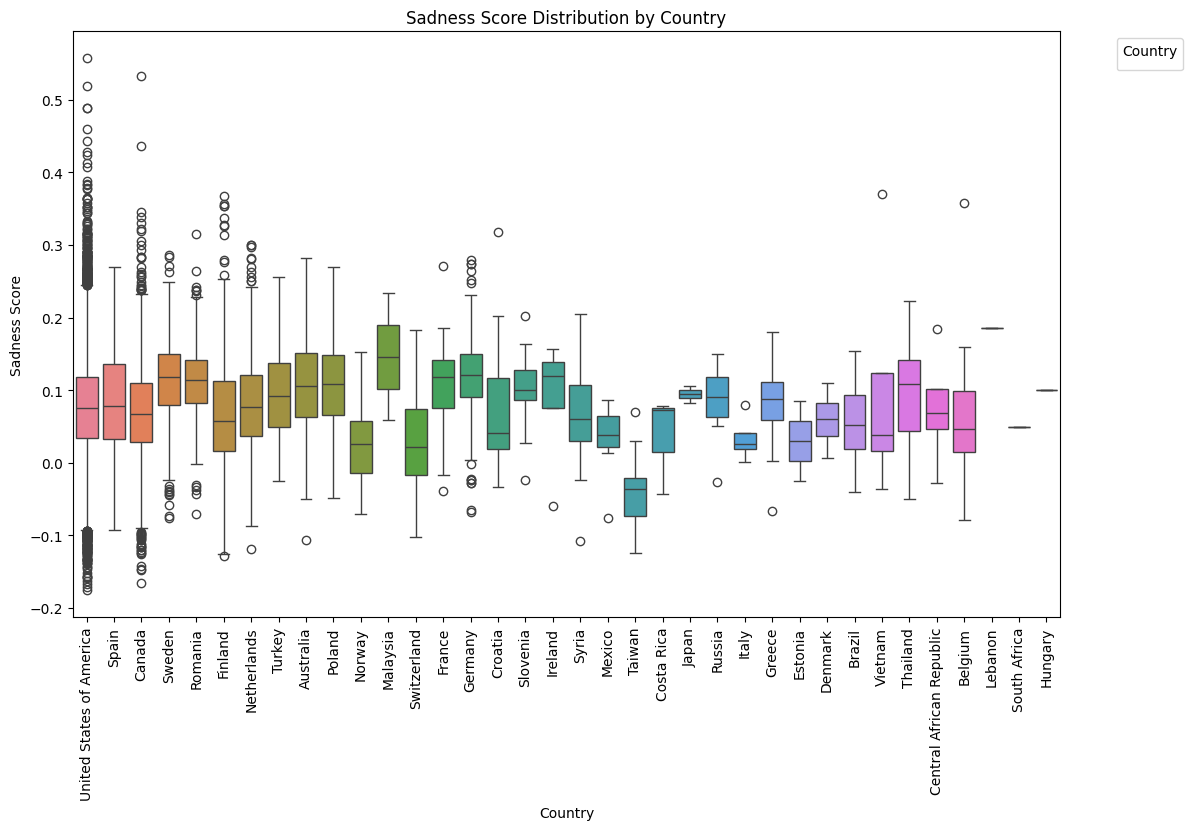

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='sadness_score', data=ba_country, hue='country')
plt.title('Sadness Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Sadness Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.xticks(rotation=90)

plt.show()

- anger_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


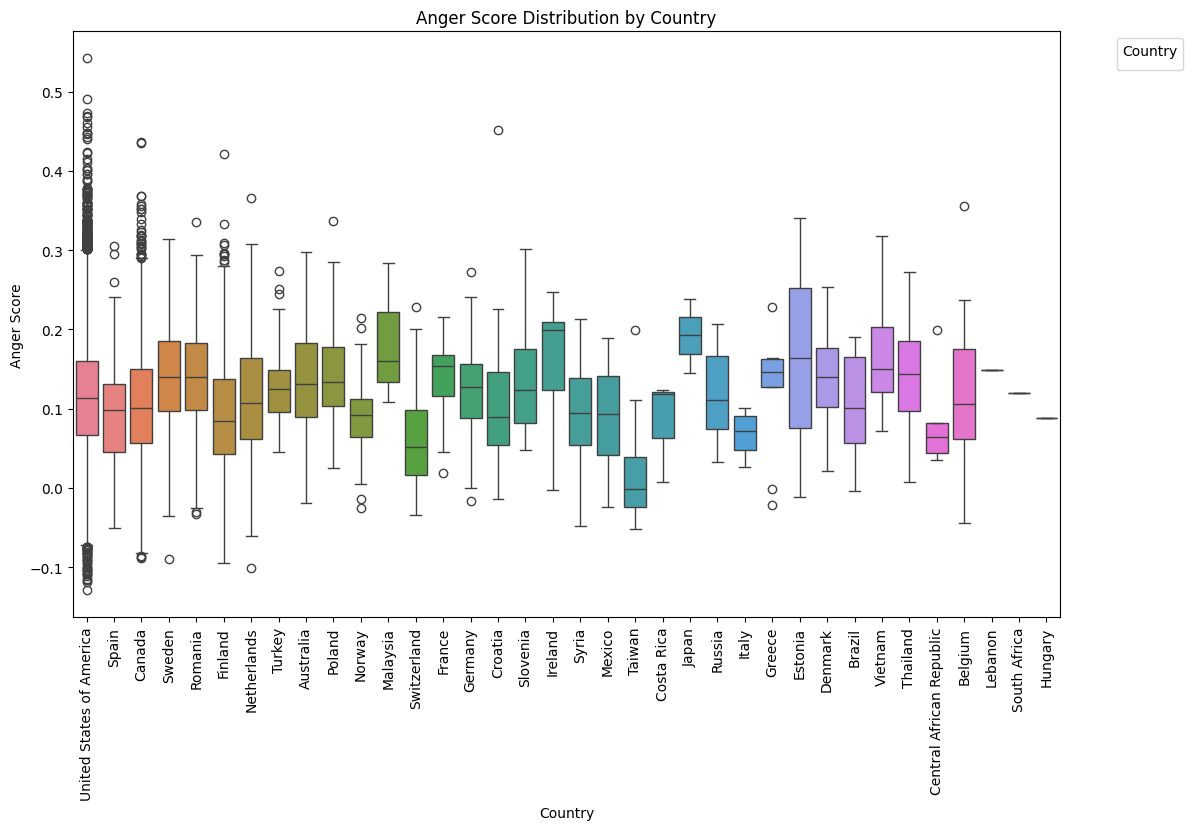

In [40]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='anger_score', data=ba_country, hue='country')
plt.title('Anger Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Anger Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.xticks(rotation=90)
plt.show()


- fear_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


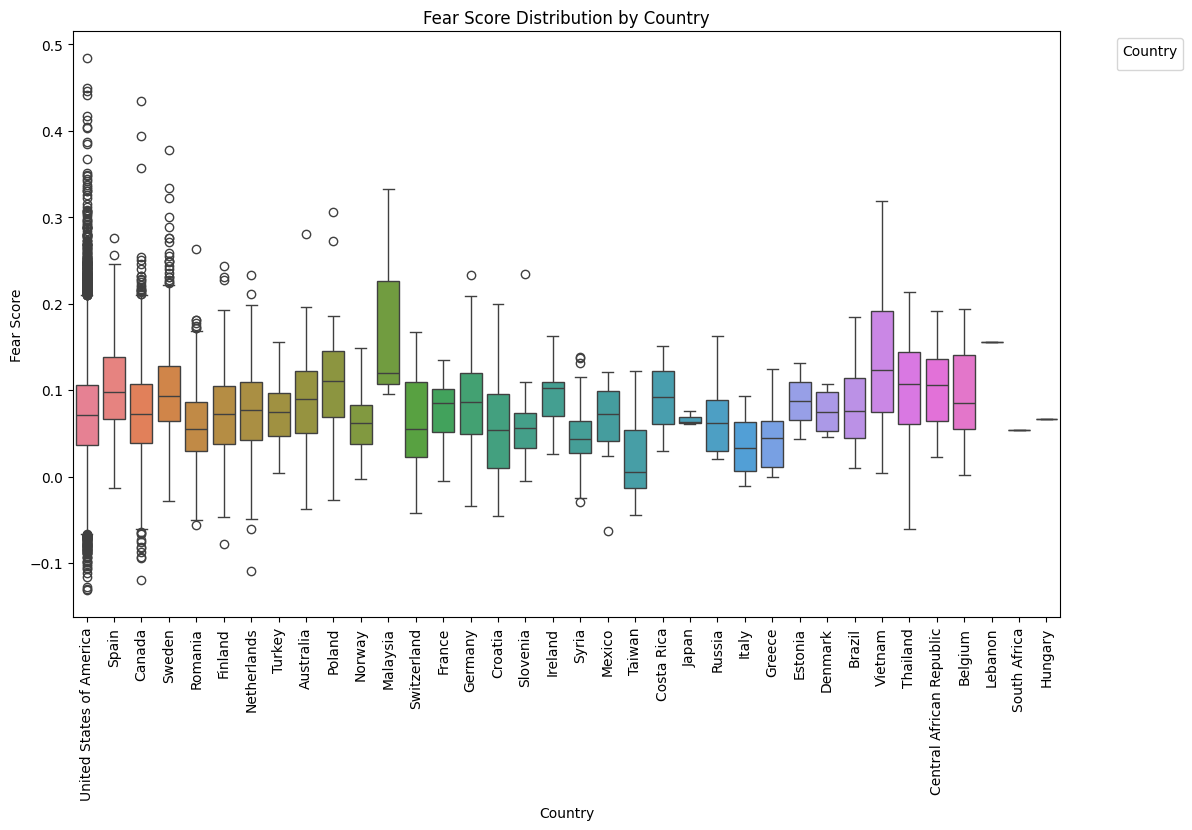

In [41]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='fear_score', data=ba_country, hue='country')
plt.title('Fear Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Fear Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.xticks(rotation=90)
plt.show()

- love_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


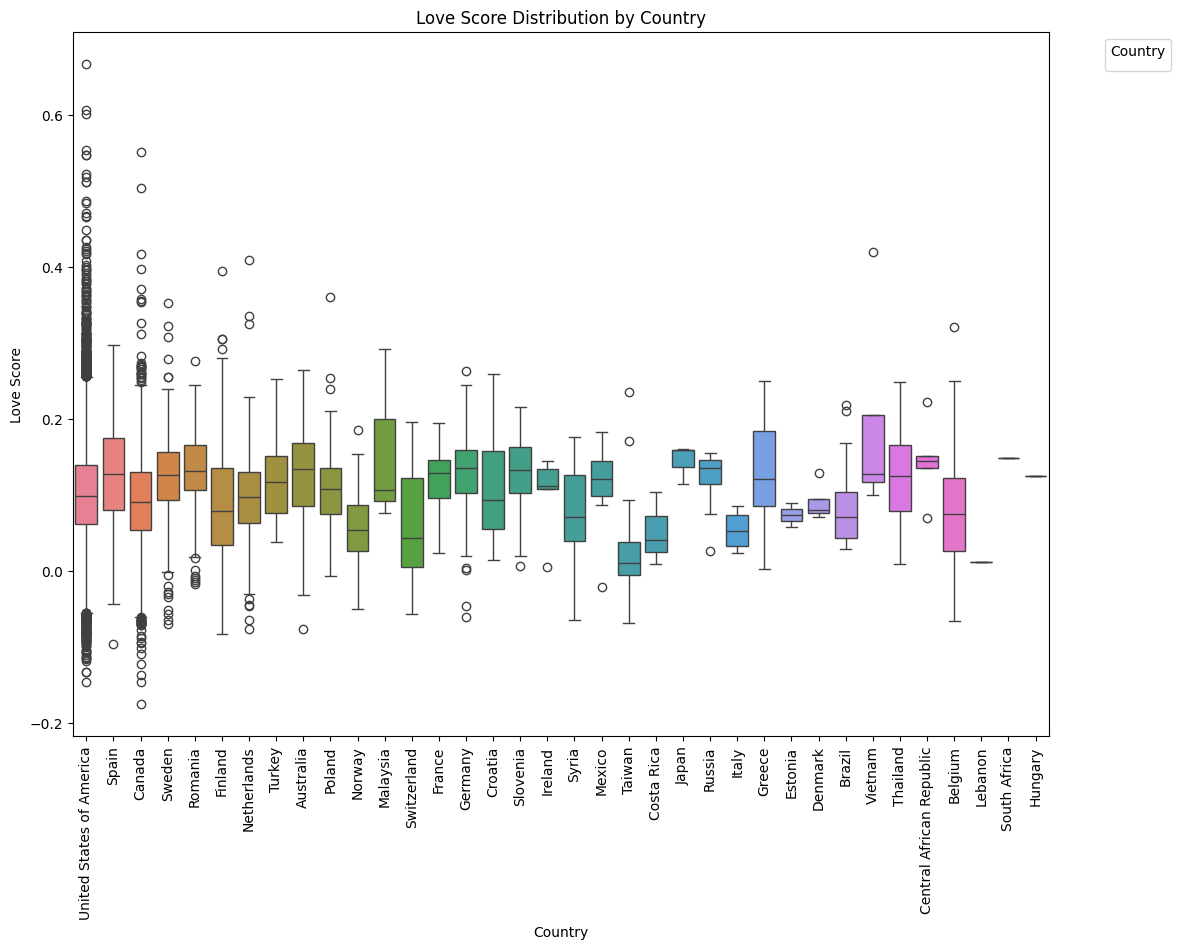

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='love_score', data=ba_country, hue='country')
plt.title('Love Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Love Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.xticks(rotation=90)
plt.show()


- surprise_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


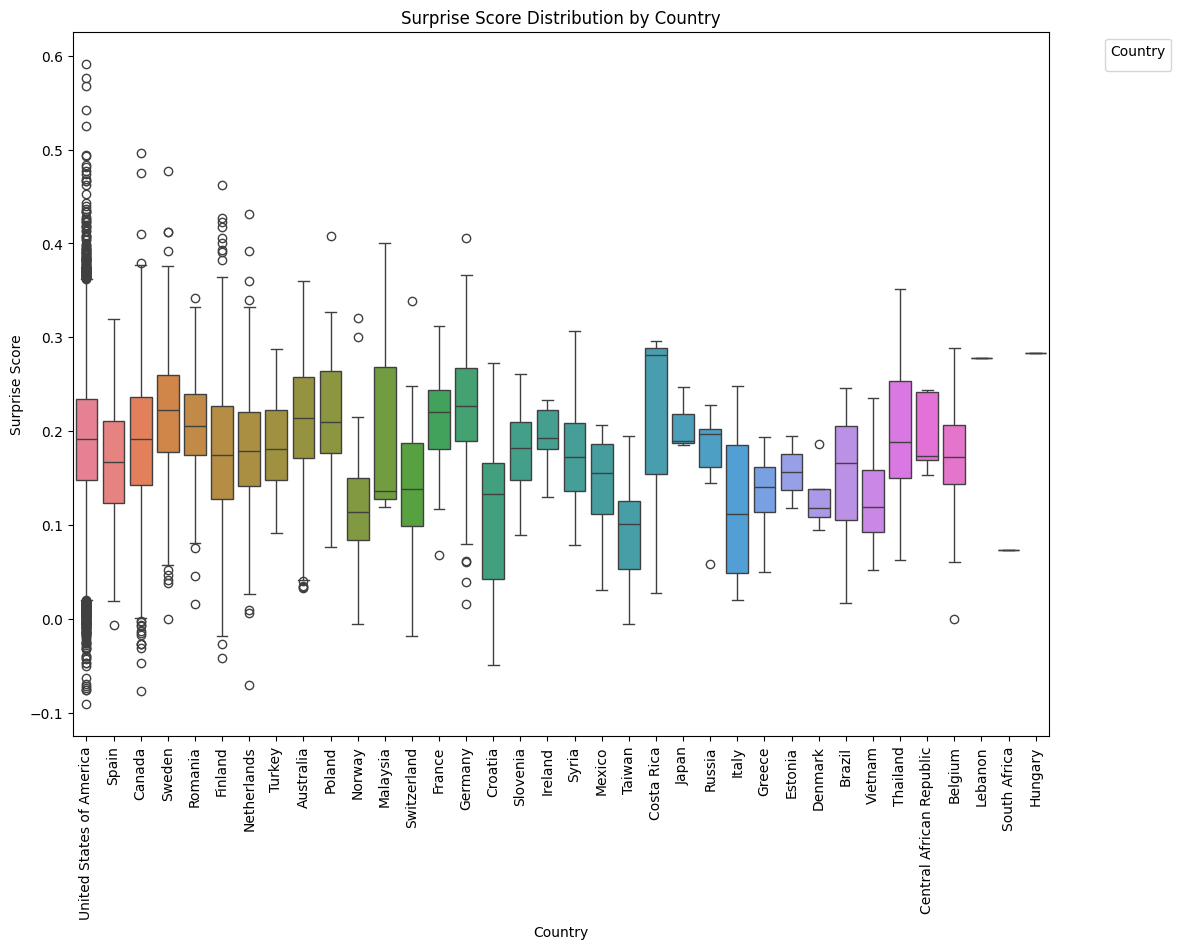

In [43]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='surprise_score', data=ba_country, hue='country')
plt.title('Surprise Score Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Surprise Score')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.xticks(rotation=90)
plt.show()


Correlation between mood and beer’s characteristics (appearance, aroma, taste)

In [60]:
correlation_matrix = ba_loc[['appearance', 'aroma', 'palate', 'taste', 'joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score']].corr()
print(correlation_matrix)

               appearance     aroma    palate     taste  joy_score  \
appearance       1.000000  0.551158  0.567433  0.539297   0.099968   
aroma            0.551158  1.000000  0.625183  0.724976   0.132882   
palate           0.567433  0.625183  1.000000  0.747452   0.123329   
taste            0.539297  0.724976  0.747452  1.000000   0.138400   
joy_score        0.099968  0.132882  0.123329  0.138400   1.000000   
sadness_score   -0.021598 -0.029916 -0.041284 -0.045161   0.566835   
anger_score      0.017123 -0.007650 -0.014685 -0.012265   0.341949   
fear_score      -0.005629 -0.033058 -0.045221 -0.047764   0.236798   
love_score       0.103895  0.102431  0.094049  0.100581   0.674329   

               sadness_score  anger_score  fear_score  love_score  
appearance         -0.021598     0.017123   -0.005629    0.103895  
aroma              -0.029916    -0.007650   -0.033058    0.102431  
palate             -0.041284    -0.014685   -0.045221    0.094049  
taste              -0.04516

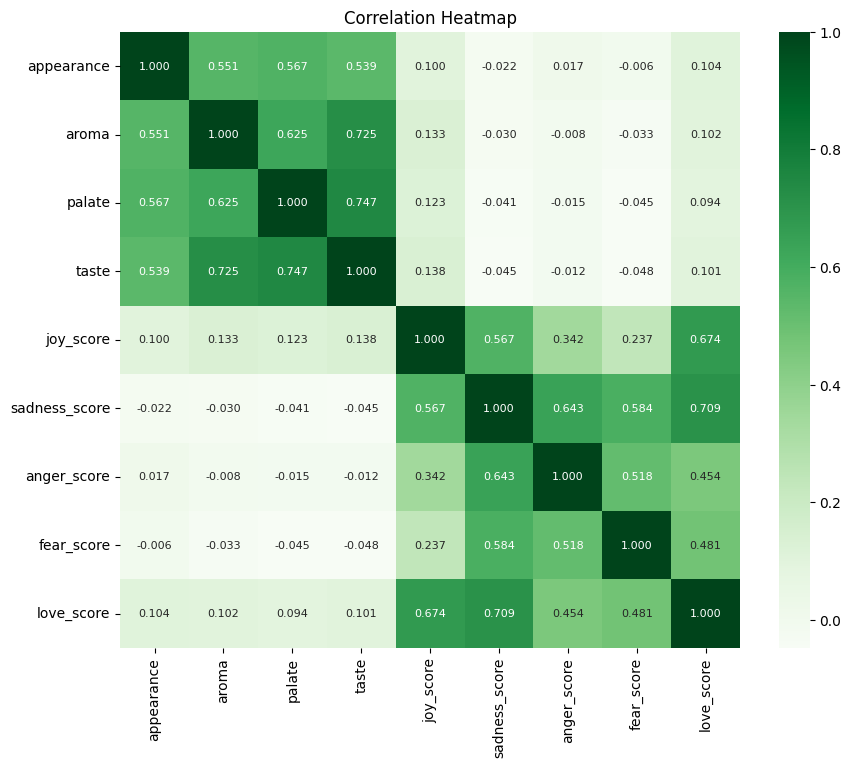

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.3f', annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()


Correlation between mood and beer ratings

In [62]:
mood_ratings = ba_loc[['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score']]
beer_rating = ba_loc['rating']
correlation_values = {}
for emotion_column in mood_ratings.columns:
    correlation_values[emotion_column] = mood_ratings[emotion_column].corr(beer_rating)


for emotion, correlation in correlation_values.items():
    print(f"Correlation between {emotion} and beer rating: {correlation}")


Correlation between joy_score and beer rating: 0.15165972232815347
Correlation between sadness_score and beer rating: -0.044662246489236244
Correlation between anger_score and beer rating: -0.01247785930540326
Correlation between fear_score and beer rating: -0.05019964413909987
Correlation between love_score and beer rating: 0.11305983605171548


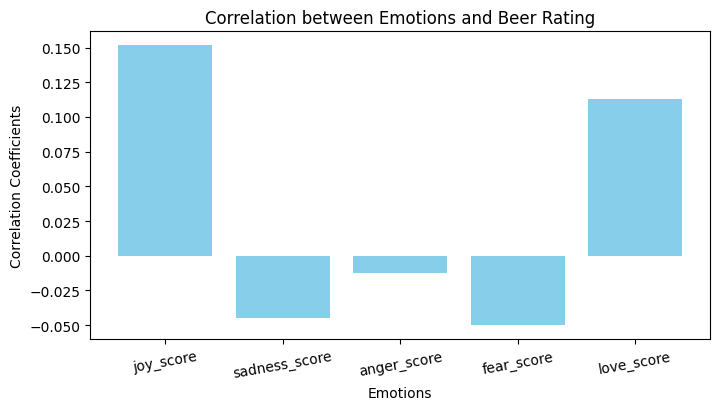

In [63]:
import matplotlib.pyplot as plt

emotions = list(correlation_values.keys())
correlation_coefficients = list(correlation_values.values())

plt.figure(figsize=(8, 4))
plt.bar(emotions, correlation_coefficients, color='skyblue')
plt.xlabel('Emotions')
plt.ylabel('Correlation Coefficients')
plt.title('Correlation between Emotions and Beer Rating')
plt.xticks(rotation=10)
plt.show()


Correlation between mood and ABV

In [66]:
mood_ratings = ba_loc[['joy_score', 'sadness_score', 'anger_score', 'fear_score', 'love_score']]
beer_abv = ba_loc['abv']
correlation_values = {}
for emotion_column in mood_ratings.columns:
    correlation_values[emotion_column] = mood_ratings[emotion_column].corr(beer_abv)


for emotion, correlation in correlation_values.items():
    print(f"Correlation between {emotion} and beer abv: {correlation}")


Correlation between joy_score and beer abv: -0.048626237167298574
Correlation between sadness_score and beer abv: -0.006462590802074734
Correlation between anger_score and beer abv: 0.06133964419227708
Correlation between fear_score and beer abv: 0.08287852853906746
Correlation between love_score and beer abv: 0.010273233661841127


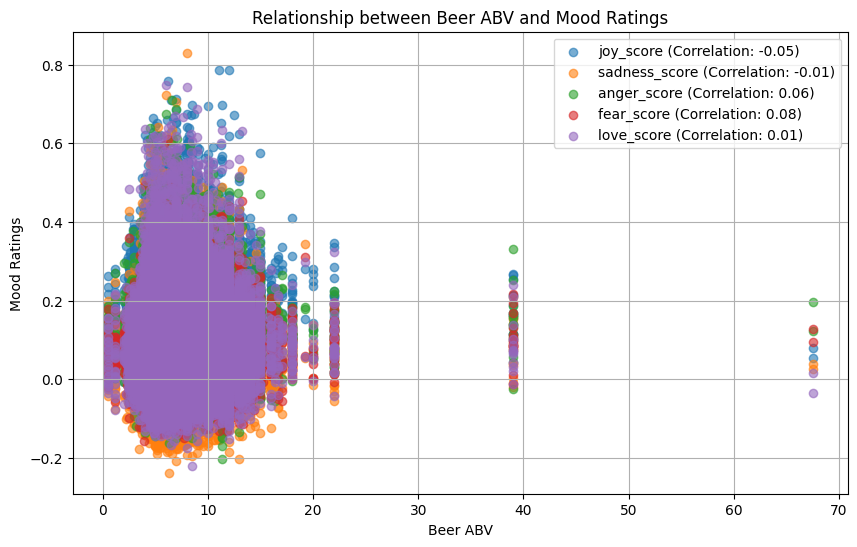

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))


for emotion, correlation in correlation_values.items():
    plt.scatter(ba_loc['abv'], ba_loc[emotion], label=f'{emotion} (Correlation: {correlation:.2f})', alpha = 0.6)


plt.title('Relationship between Beer ABV and Mood Ratings')
plt.xlabel('Beer ABV')
plt.ylabel('Mood Ratings')
plt.legend()
plt.grid(True)
plt.show()
